In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10, 7)});

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('data/churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [25]:
df.columns = df.columns.map(lambda col: col.replace(' ','_'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   international_plan      3333 non-null   int64  
 2   voice_mail_plan         3333 non-null   int64  
 3   number_vmail_messages   3333 non-null   int64  
 4   total_day_minutes       3333 non-null   float64
 5   total_day_calls         3333 non-null   int64  
 6   total_day_charge        3333 non-null   float64
 7   total_eve_minutes       3333 non-null   float64
 8   total_eve_calls         3333 non-null   int64  
 9   total_eve_charge        3333 non-null   float64
 10  total_night_minutes     3333 non-null   float64
 11  total_night_calls       3333 non-null   int64  
 12  total_night_charge      3333 non-null   float64
 13  total_intl_minutes      3333 non-null   float64
 14  total_intl_calls        3333 non-null   

## Data Transformation

In [11]:
df.drop(columns=['state', 'area code', 'phone number'], axis=1, inplace=True)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
df['churn'] = df['churn'].map({False: 0, True: 1})
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
df['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

In [17]:
df['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

## Adding Columns For Features

### Totals for Columns

In [18]:
df['total_charges'] = round(df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge'] + df['total_intl_charge'])

In [19]:
df['total_calls'] = round(df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls'] + df['total_intl_calls'])

In [26]:
df['total_minutes'] = round(df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes'] + df['total_intl_minutes'])

### Average for Columns

In [23]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_charge_per call'] = round(df['total_day_charge'] / (df['total_day_calls'] + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_charge_per_call'] = round(df['total_eve_charge'] / (df['total_eve_calls'] + 0.00000000001), 3)
    
# 'total night minutes', 'total night calls', 'total night charge'
df['night_charge_per_call'] = round(df['total_night_charge'] / (df['total_night_calls'] + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_charge_per_call'] = round(df['total_intl_charge'] / (df['total_intl_calls'] + 0.00000000001), 3)

In [28]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_call_length_per_call'] = round(df['total_day_minutes'] / (df['total_day_calls']  + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_call_length_per_call'] = round(df['total_eve_minutes'] / (df['total_eve_calls']  + 0.00000000001), 3)
    
#  'total night minutes', 'total night calls', 'total night charge'
df['night_call_length_per_call'] = round(df['total_night_minutes'] / (df['total_night_calls']  + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_call_length_per_call'] = round(df['total_intl_minutes'] / (df['total_intl_calls']  + 0.00000000001), 3)

In [29]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_charge_per_min'] = round(df['total_day_charge'] / (df['total_day_minutes'] + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_charge_per_min'] = round(df['total_eve_charge'] / (df['total_eve_minutes'] + 0.00000000001), 3)
    
# 'total night minutes', 'total night calls', 'total night charge'
df['night_charge_per_min'] = round(df['total_night_charge'] / (df['total_night_minutes'] + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_charge_per_min'] = round(df['total_intl_charge'] / (df['total_intl_minutes'] + 0.00000000001), 3)

In [31]:
#  'total day minutes', 'total day calls', 'total day charge'
df['day_charge_percentage'] = round(df['total_day_charge'] / (df['total_charges'] + 0.00000000001), 3)
    
#  'total eve minutes', 'total eve calls', 'total eve charge'
df['eve_charge_percentage'] = round(df['total_eve_charge'] / (df['total_charges'] + 0.00000000001), 3)
    
# 'total night minutes', 'total night calls', 'total night charge'
df['night_charge_percentage'] = round(df['total_night_charge'] / (df['total_charges'] + 0.00000000001), 3)

# 'total intl minutes', 'total intl calls', 'total intl charge'
df['intl_charge_percentage'] = round(df['total_intl_charge'] / (df['total_charges'] + 0.00000000001), 3)

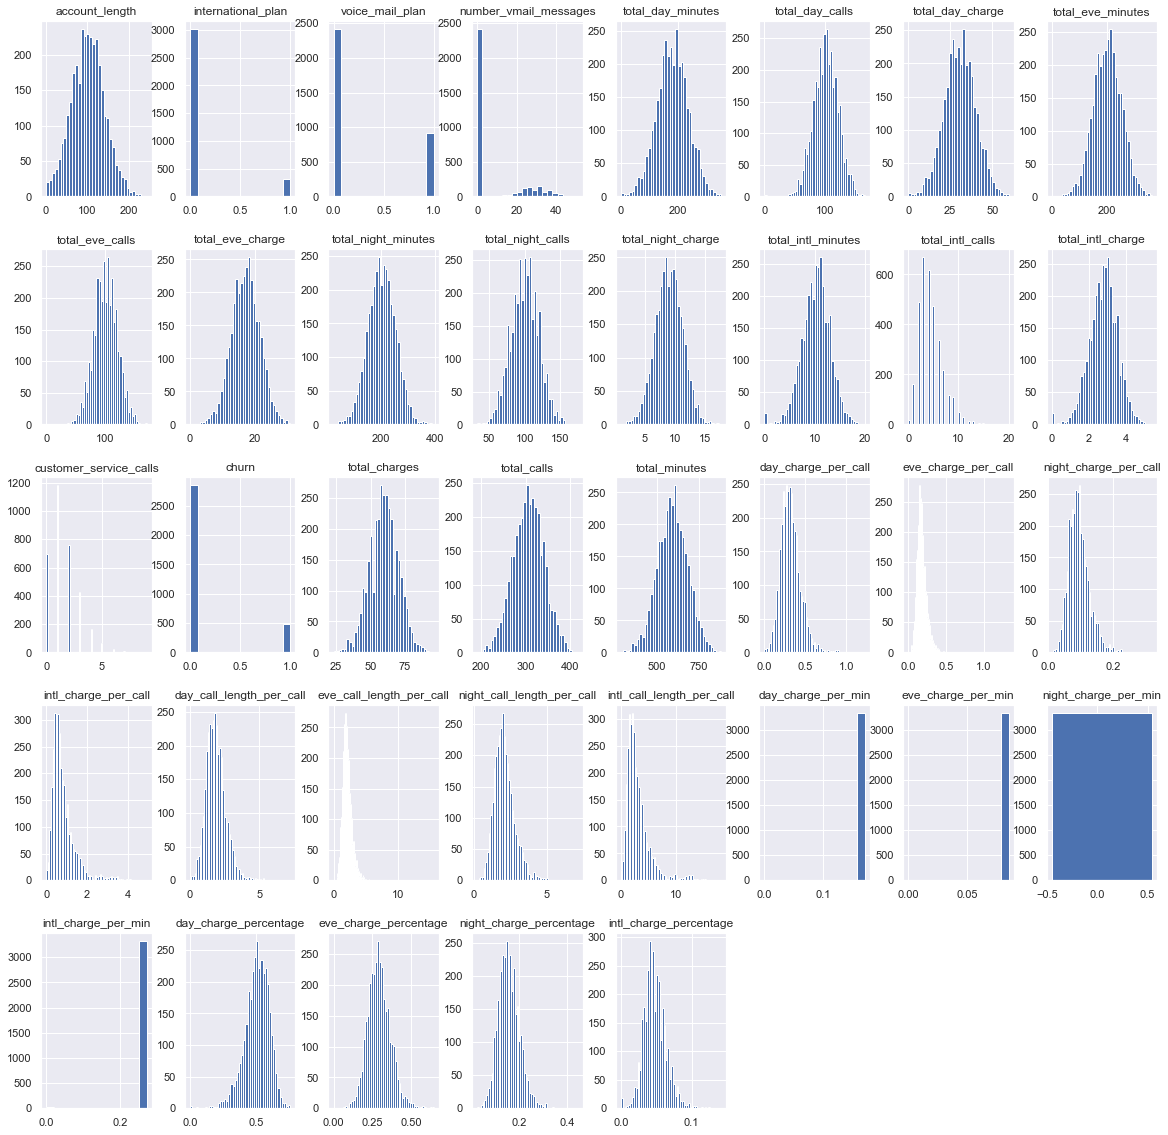

In [32]:
df.hist(bins='auto', layout=(5,8), figsize = (20,20));

In [33]:
df.to_csv('data/churn_clean.csv')

In [ ]:
s